In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [18]:
versions = ["V1", "V2", "V3"]
aggResults = []
for version in versions:
    try:
        path = f"/home/yhbedoya/Repositories/SHM-MAE/TrafficEstimation/results/TrafficEstimationResultsEvaluationAgg{version}.csv"
        versionDf = pd.read_csv(path)
        versionDf["version"] = version
        aggResults.append(versionDf)
    except:
        print(f"Version {version} non available")

aggResultsDf = pd.concat(aggResults)
aggResultsDf.drop("Unnamed: 0", axis=1, inplace=True)
aggResultsDf["epoch"] = aggResultsDf["checkpoints"].apply(lambda x: x.split("-")[1].split(".")[0])
aggResultsDf

Version V1 non available


,checkpoints,MSE,RMSE,MAE,version,epoch
0,checkpoint-0.pth,0.513624,0.716675,0.551680,V2,0
1,checkpoint-10.pth,0.420923,0.648785,0.465275,V2,10
2,checkpoint-20.pth,0.391769,0.625915,0.446671,V2,20
3,checkpoint-30.pth,0.380122,0.616540,0.436857,V2,30
4,checkpoint-40.pth,0.419939,0.648027,0.472727,V2,40
5,checkpoint-50.pth,0.418908,0.647231,0.481843,V2,50
6,checkpoint-60.pth,0.370077,0.608339,0.417807,V2,60
7,checkpoint-70.pth,0.381845,0.617936,0.448104,V2,70
8,checkpoint-80.pth,0.359146,0.599288,0.429064,V2,80
9,checkpoint-90.pth,0.369950,0.608236,0.450077,V2,90


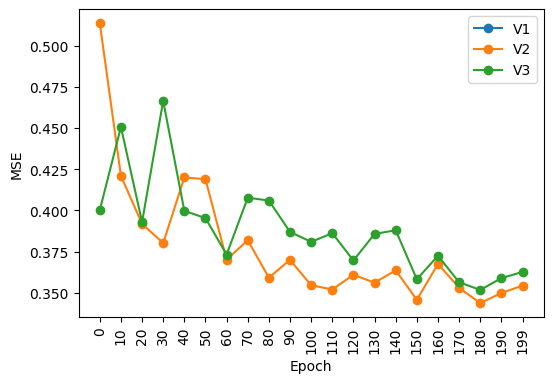

In [16]:
plt.rcParams['figure.figsize'] = [6, 4]
for version in versions:
    versionResDf = aggResultsDf[aggResultsDf["version"] == version]
    x_categories = versionResDf["epoch"].unique()

    #pltDf = resultsTimeDf[resultsTimeDf["threshold"]==thresholdOpt]
    #x_categories = pltDf["sizeMovingAverage"]

    # Create the plot
    
    plt.plot(x_categories, versionResDf["MSE"], marker='o', label=version)
    #plt.plot(x_categories, pltDf["sensitivity"], marker='v', label='sensitivity')
    #plt.plot(x_categories, pltDf["specificity"], marker='s', label='specificity')

# Add labels and title
#plt.ylim(0.9, 1)
plt.xlabel('Epoch')
plt.ylabel('MSE')
#plt.title(f'Statistics for Threshold Mean + {thresholdOpt}')

# Add legend
plt.legend()
plt.xticks(x_categories, rotation='vertical')
# Display the plot
plt.show()

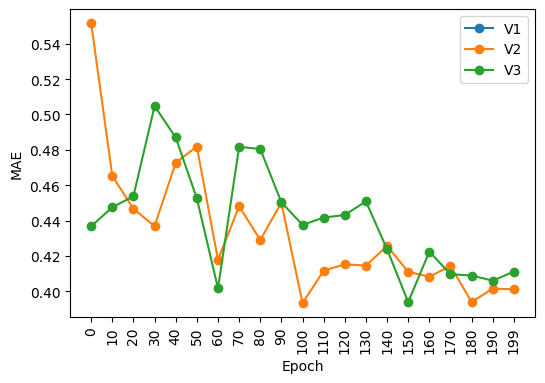

In [17]:
plt.rcParams['figure.figsize'] = [6, 4]
for version in versions:
    versionResDf = aggResultsDf[aggResultsDf["version"] == version]
    x_categories = versionResDf["epoch"].unique()

    #pltDf = resultsTimeDf[resultsTimeDf["threshold"]==thresholdOpt]
    #x_categories = pltDf["sizeMovingAverage"]

    # Create the plot
    
    plt.plot(x_categories, versionResDf["MAE"], marker='o', label=version)
    #plt.plot(x_categories, pltDf["sensitivity"], marker='v', label='sensitivity')
    #plt.plot(x_categories, pltDf["specificity"], marker='s', label='specificity')

# Add labels and title
#plt.ylim(0.9, 1)
plt.xlabel('Epoch')
plt.ylabel('MAE')
#plt.title(f'Statistics for Threshold Mean + {thresholdOpt}')

# Add legend
plt.legend()
plt.xticks(x_categories, rotation='vertical')
# Display the plot
plt.show()

For version1

In [ ]:
def evaluateModels(trainedModels, numFeatures, X_test, y_test):

    results = {"model": [],
               "mse": [],
               "mae": [],
               "mape": [],
               "r2": []}

    for name, model in trainedModels.items():
        y_pred_test = model.predict(X_test)

        predictions = {
            "TrueValue": y_test,
            "PredictedValue": y_pred_test
        }
        predictionsDf = pd.DataFrame(predictions)

        predictionsDf.to_csv(f"/home/yvelez/SHM-MAE/ReplicaBurrello2021/predictions/{name}_{numFeatures}.csv")

        results["model"].append(name)
        results["mse"].append(mean_squared_error(y_test, y_pred_test))
        results["mae"].append(mean_absolute_error(y_test, y_pred_test))
        results["mape"].append((np.mean(np.abs(y_test - y_pred_test)) / np.mean(y_test)) * 100)
        results["r2"].append(r2_score(y_test, y_pred_test))

    return results

In [6]:
path = f"/home/yhbedoya/Repositories/SHM-MAE/TrafficEstimation/results/Single/TrafficEstimationResultsEvaluationV1.csv"
versionOneDf = pd.read_csv(path, usecols=["y_true", "y_pred"])
versionOneDf

,y_true,y_pred
0,1,1.230913
1,1,1.561031
2,1,1.390824
3,1,1.352947
4,0,1.206667
...,...,...
24153,1,1.223567
24154,1,1.219112
24155,2,1.403409
24156,1,1.134406


In [8]:
y_true = versionOneDf["y_true"]
y_pred = versionOneDf["y_pred"]
results ={}

results["mse"] = mean_squared_error(y_true, y_pred)
results["mae"] = mean_absolute_error(y_true, y_pred)
results["mape"]=(np.mean(np.abs(y_true - y_pred)) / np.mean(y_true)) * 100
results["r2"]=r2_score(y_true, y_pred)
results

{'mse': 0.350066776665382,
 'mae': 0.4121747151833761,
 'mape': 26.258746754746838,
 'r2': 0.5335982855959869}

In [ ]:
versions = ["V2", "V3"]
aggResults = []
for version in versions:
    try:
        path = f"/home/yhbedoya/Repositories/SHM-MAE/TrafficEstimation/results/Single/TrafficEstimationResultsEvaluationV2_checkpoint-0.pth.csv"
        versionDf = pd.read_csv(path)
        versionDf["version"] = version
        aggResults.append(versionDf)
    except:
        print(f"Version {version} non available")

aggResultsDf = pd.concat(aggResults)
aggResultsDf.drop("Unnamed: 0", axis=1, inplace=True)
aggResultsDf["epoch"] = aggResultsDf["checkpoints"].apply(lambda x: x.split("-")[1].split(".")[0])
aggResultsDf

In [21]:
directory = f"/home/yhbedoya/Repositories/SHM-MAE/TrafficEstimation/results/Single/"
 
results = {"epoch": [],
           "version": [],
            "MSE": [],
            "MAE": [],
            "MAPE": [],
            "R2": []}


for filename in os.listdir(directory):
    if not ".pth" in filename:
        continue
    path = directory + filename
    df = pd.read_csv(path, usecols=["y_true", "y_pred"])

    epoch = filename.split("-")[1].split(".")[0]
    version = filename.split("_")[0][-2:]

    y_true = df["y_true"]
    y_pred = df["y_pred"]

    results["epoch"].append(int(epoch))
    results["version"].append(version)
    results["MSE"].append(mean_squared_error(y_true, y_pred))
    results["MAE"].append(mean_absolute_error(y_true, y_pred))
    results["MAPE"].append((np.mean(np.abs(y_true - y_pred)) / np.mean(y_true)) * 100)
    results["R2"].append(r2_score(y_true, y_pred))
    
resultsDf = pd.DataFrame(results)
resultsDf

,epoch,version,MSE,MAE,MAPE,R2
0,40,V3,0.399678,0.486988,31.024910,0.467500
1,20,V4,0.557955,0.534974,34.083836,0.256553
2,0,V2,0.513624,0.551680,35.146336,0.315688
3,110,V3,0.386147,0.441680,28.138462,0.485528
4,110,V2,0.351952,0.411633,26.224212,0.531087
...,...,...,...,...,...,...
58,10,V2,0.420923,0.465275,29.641626,0.439196
59,40,V2,0.419939,0.472727,30.116402,0.440506
60,50,V3,0.395286,0.452562,28.831743,0.473352
61,60,V4,0.477830,0.481233,30.659924,0.363316


In [43]:
resultsDf[resultsDf["version"] == "V4"]

,epoch,version,MSE,MAE,MAPE,R2
1,20,V4,0.557955,0.534974,34.083836,0.256553
5,170,V4,0.426824,0.466136,29.698046,0.431280
8,80,V4,0.505742,0.557524,35.520536,0.326125
12,190,V4,0.432768,0.475366,30.286121,0.423359
13,30,V4,0.531134,0.581292,37.034791,0.292291
15,10,V4,0.532701,0.556783,35.473286,0.290204
16,50,V4,0.502555,0.568563,36.223819,0.330371
17,160,V4,0.423983,0.470816,29.996211,0.435065
19,150,V4,0.423670,0.466736,29.736279,0.435482
21,100,V4,0.449307,0.485036,30.902205,0.401321


In [33]:
resultsDf[resultsDf["version"] == "V2"][["epoch", "MSE"]].sort_values("epoch")

,epoch,MSE
2,0,0.513624
58,10,0.420923
56,20,0.391769
6,30,0.380122
59,40,0.419939
18,50,0.418908
9,60,0.370077
14,70,0.381845
23,80,0.359146
20,90,0.369950


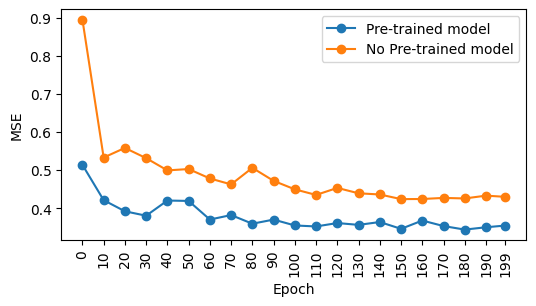

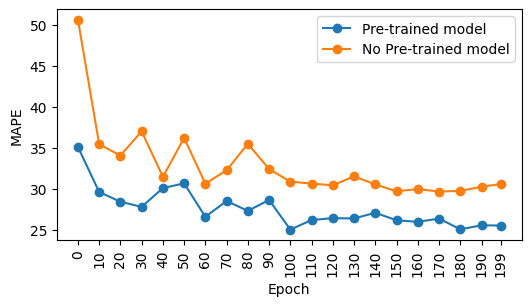

In [32]:
plt.rcParams['figure.figsize'] = [6, 3]
versionMap = {"V2": "Pre-trained model",
              "V4": "No Pre-trained model"}

for metric in ["MSE", "MAPE"]:
    for version in ["V2", "V4"]:
        versionResDf = resultsDf[resultsDf["version"] == version].sort_values("epoch")
        x_categories = versionResDf["epoch"].unique()
        
        plt.plot(x_categories, versionResDf[metric], marker='o', label=versionMap[version])
        #plt.plot(x_categories, pltDf["sensitivity"], marker='v', label='sensitivity')
        #plt.plot(x_categories, pltDf["specificity"], marker='s', label='specificity')


    plt.xlabel('Epoch')
    plt.ylabel(metric)
    #plt.title(f'Statistics for Threshold Mean + {thresholdOpt}')

    # Add legend
    plt.legend()
    plt.xticks(x_categories, rotation='vertical')
    # Display the plot
    plt.show()

In [38]:
version2 = resultsDf[resultsDf["version"] == "V2"][["epoch", "MSE"]].sort_values("epoch")
version4 = resultsDf[resultsDf["version"] == "V4"][["epoch", "MSE"]].sort_values("epoch")

comparisonDf = version2.set_index("epoch").join(version4.set_index("epoch"), lsuffix="V2", rsuffix="V4").reset_index()
comparisonDf["difference"] = (comparisonDf["MSEV4"] - comparisonDf["MSEV2"])/comparisonDf["MSEV4"]
comparisonDf

,epoch,MSEV2,MSEV4,difference
0,0,0.513624,0.894599,0.425862
1,10,0.420923,0.532701,0.209833
2,20,0.391769,0.557955,0.297848
3,30,0.380122,0.531134,0.284321
4,40,0.419939,0.499016,0.158466
5,50,0.418908,0.502555,0.166445
6,60,0.370077,0.477830,0.225506
7,70,0.381845,0.462281,0.173997
8,80,0.359146,0.505742,0.289864
9,90,0.369950,0.471563,0.215481


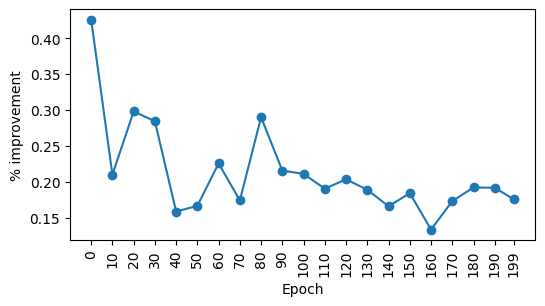

In [41]:
plt.plot(comparisonDf["epoch"].unique(), comparisonDf["difference"], marker='o')
#plt.plot(x_categories, pltDf["sensitivity"], marker='v', label='sensitivity')
#plt.plot(x_categories, pltDf["specificity"], marker='s', label='specificity')


plt.xlabel('Epoch')
plt.ylabel("% improvement")
#plt.title(f'Statistics for Threshold Mean + {thresholdOpt}')

# Add legend
plt.xticks(x_categories, rotation='vertical')
# Display the plot
plt.show()